In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

> ## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


> ## Overview of the Data

> #### To understand the structure of the dataset, including the number of rows, columns, and data types

> ##  Data Loading

In [3]:
from scripts.data_loader import dataLoading
data=dataLoading()

> ## Check Loaded Dataset

In [4]:
data.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

> ## Summary Statistics

> #### To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


> ## Distribution of Numerical Features

> #### Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

In [7]:
# Identify numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


> ### Count the value of each columns


In [8]:
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        print(f'{data[col].nunique()} Unique Value\n\n')

Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




> ### Count the value of Amount and Value columns

In [9]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
-5.98             1
 101500.00        1
 101350.00        1
 9585.00          1
 5890.00          1
Name: count, Length: 1676, dtype: int64


In [10]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
-5.98             1
 101500.00        1
 101350.00        1
 9585.00          1
 5890.00          1
Name: count, Length: 1676, dtype: int64


> ### Check the Skewness value of numerical columns

In [11]:

from scripts.data_cleaning import display_skewness
display_skewness(data)

CountryCode
Skewness: 0.0
Kurtosis: 0.0
Amount
Skewness: 51.098489522819115
Kurtosis: 3363.1277386950474
Value
Skewness: 51.29108598736249
Kurtosis: 3378.069273754232
PricingStrategy
Skewness: 1.6590573072757961
Kurtosis: 2.087533632908269
FraudResult
Skewness: 22.196294806589147
Kurtosis: 490.6857618799325


{'CountryCode': {'Skewness': 0.0, 'Kurtosis': 0.0},
 'Amount': {'Skewness': 51.098489522819115, 'Kurtosis': 3363.1277386950474},
 'Value': {'Skewness': 51.29108598736249, 'Kurtosis': 3378.069273754232},
 'PricingStrategy': {'Skewness': 1.6590573072757961,
  'Kurtosis': 2.087533632908269},
 'FraudResult': {'Skewness': 22.196294806589147,
  'Kurtosis': 490.6857618799325}}

> ### Amount, Value and Fraud Result columns have high skew value

In [12]:
print(data[data['FraudResult']==0].shape[0])
print(data[data['FraudResult']==1].shape[0])

95469
193


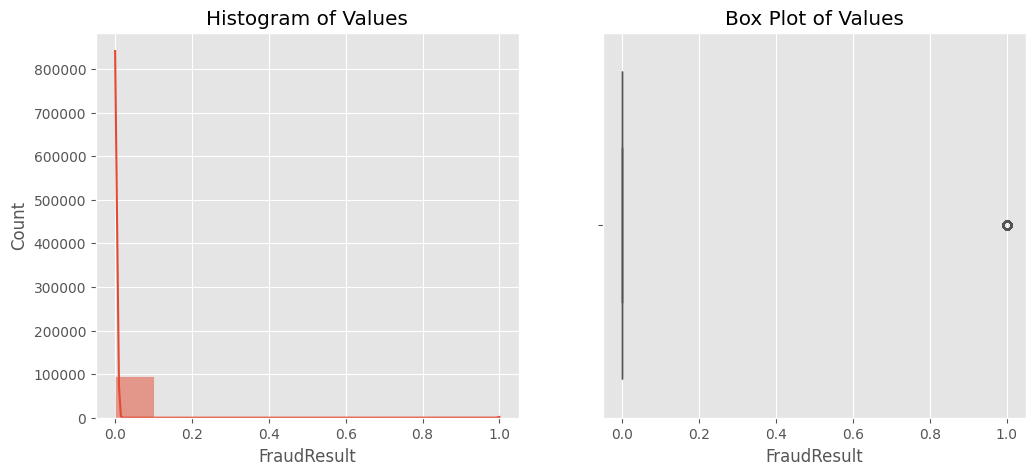

In [13]:
from scripts.visualize import plot_fraud_result
plot_fraud_result(data)

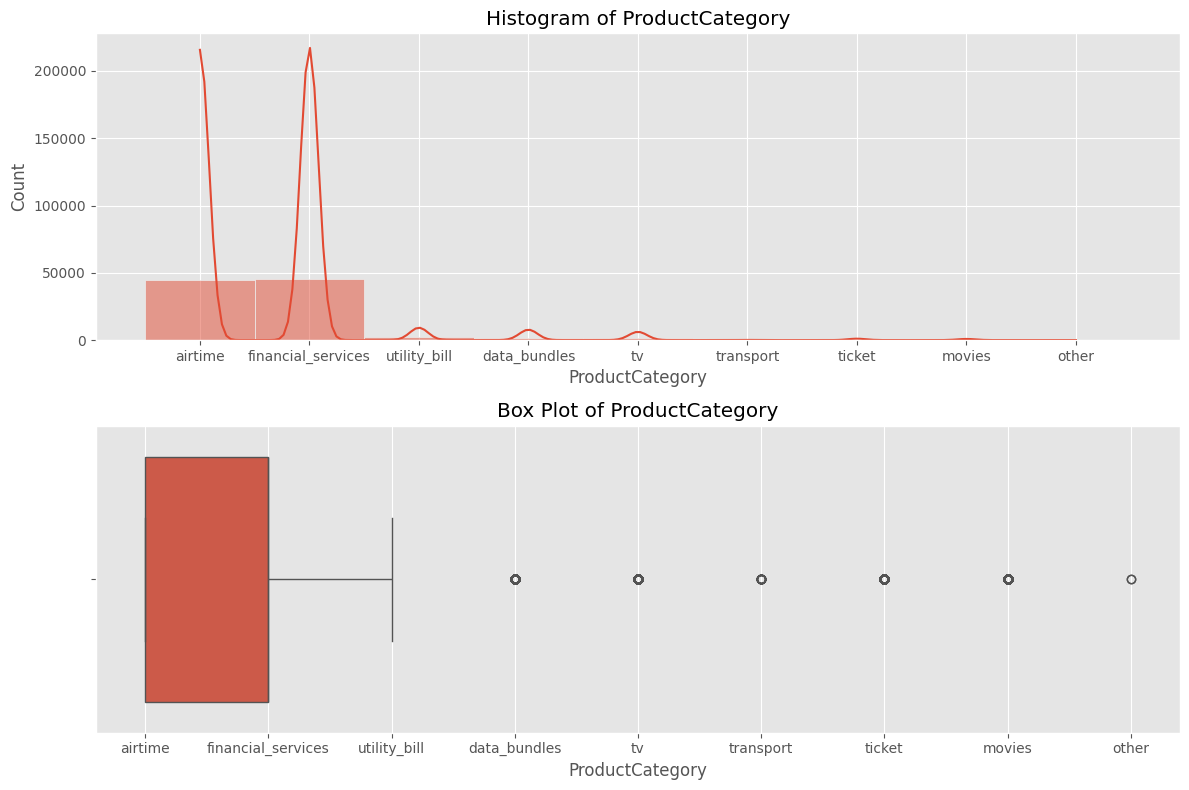

In [14]:
from scripts.visualize import plot_product_category
plot_product_category(data)

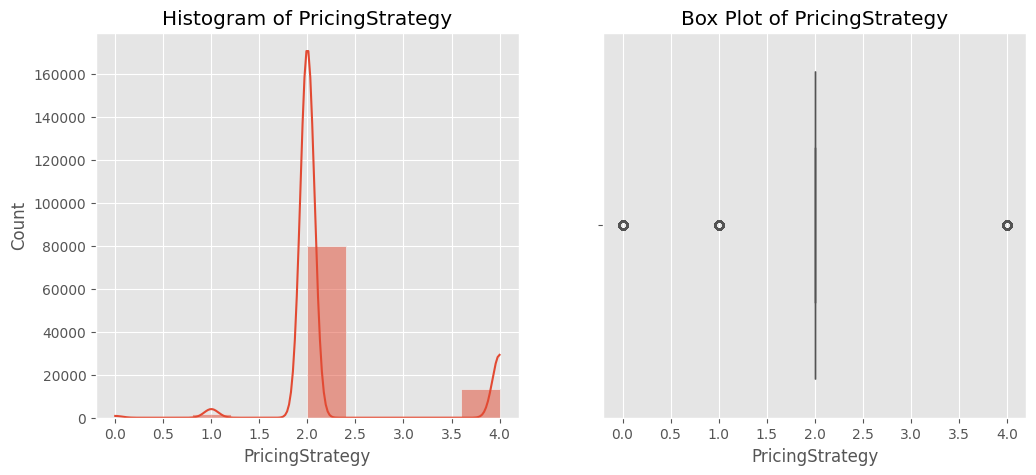

In [15]:
from scripts.visualize import pricing_strategy
pricing_strategy(data)

> ## Visualize the distribution of numerical features


In [16]:
# from scripts.visualize import visualize_numerical_features
# visualize_numerical_features(data)

> ## Distribution of Categorical Features

> ### Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [17]:
# # Identify categorical features
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# print(categorical_columns)

Distribution of many values column

In [18]:
# print(data['AccountId'].value_counts())


In [19]:
# from scripts.visualize import visualize_categorical_features
# data1 = data[[ 'CurrencyCode', 'CountryCode', 'ProviderId',
#        'ProductCategory', 'ChannelId', 'Amount', 'Value',
#        'PricingStrategy', 'FraudResult']]
# visualize_categorical_features(data1)

In [20]:
# numerical_cols = data.select_dtypes(include=['number']).columns
# data[numerical_cols]

> ## Correlation Analysis

> ### To Understanding the relationship between numerical features.


In [21]:
# from scripts.visualize import correlation_analysis
# correlation_analysis(data)

> ## Identifying Missing Values

> ### Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [22]:
# from scripts.data_cleaning import find_missing_values
# find_missing_values(data)

> ### The Datasets have no missing values

> ## Outlier Detection

> ### Using box plots to identify outliers.

In [23]:
# from scripts.data_cleaning import boxPlotForDetectOutliers
# boxPlotForDetectOutliers(data,['Amount','Value'])

> ### From Numerical Columns Amount and Value have Outliers

> ## Remove outliers

In [24]:
# from scripts.data_cleaning import remove_outliers_winsorization
# data=remove_outliers_winsorization(data, ['Amount','Value'])

In [25]:
# data.head()


In [26]:
# boxPlotForDetectOutliers(data,['Amount','Value'])

> # Feature Engineering

> ## Create Aggregate Features

In [27]:
# data.head()


In [28]:
# data.shape

In [29]:
# from scripts.feature_engineering import aggregate_features
# data['CustomerId'] = data['CustomerId'].astype(str)

# aggregated = aggregate_features(data, 'CustomerId')

# aggregated['CustomerId'] = aggregated['CustomerId'].astype(str)

# data = pd.merge(data, aggregated, on='CustomerId', how='left')

# nan_average = data[data['Average_Transaction_Amount'].isna()].head()
# print(nan_average)

In [30]:
# data.describe()

> ## Extract Date and Time Features

In [31]:
# from scripts.feature_engineering import time_correction
# time_correction(data)
# data[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head()

In [32]:

# def time_correction(data):
#     data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

#     # Extract features from the TransactionStartTime
#     data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour
#     data['Transaction_Day'] = data['TransactionStartTime'].dt.day
#     data['Transaction_Month'] = data['TransactionStartTime'].dt.month
#     data['Transaction_Year'] = data['TransactionStartTime'].dt.year
#     return data

> ## Encoding Categorical Variables

> #### using One-Hot Encoding for categorical features

In [33]:
# from scripts.feature_engineering import one_hot_encoder
# data = one_hot_encoder(data)

In [34]:
# pd.set_option('display.max_columns',None)
# data.head()

> ## Handling Missing Values

> ### The given datasets have no any missing values

In [35]:
# from scripts.feature_engineering import null_value_imputing_KNN
# print(data.isnull().sum())

# data[data.select_dtypes(include=[np.number]).columns] = null_value_imputing_KNN(data)

In [36]:
# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [37]:
# numerical_columns

In [38]:
# data.describe()

In [39]:
# data.head(10)

In [40]:
# # Display the standardized DataFrame
# from scripts.feature_engineering import Standardize
# print("Standardized DataFrame:")
# Standardize(data,numerical_columns).head()

# Default estimator and WoE binning 

In [41]:
# import pandas as pd
# # Assuming df is your original DataFrame with all transactions
# from scripts.feature_engineering import combine_rfms
# from scripts.feature_engineering import classify_customers_by_rfms

# rfms_scores = combine_rfms(data, 'CustomerId')
# rfms_classification = classify_customers_by_rfms(rfms_scores)

# rfms_classification.head()

>> ## Woe binning

In [42]:
# data = pd.merge(data, rfms_classification, on='CustomerId', how='left')
# data.head()

In [43]:
# data['TotalRFMS'] = data['Recency'].astype(int) + data['Frequency'].astype(int) + data['Monetary'].astype(int) + data['Seasonality'].astype(int)


In [44]:
# print(data[['CustomerId', 'Recency', 'Frequency', 'Monetary','Seasonality', 'TotalRFMS']].head())
# pd.set_option('display.float_format', '{:.2f}'.format)
# data.describe()

In [45]:
# from scripts.feature_engineering import calculate_risk_category
# calculate_risk_category(data)

In [46]:
# print(data['RiskCategory'].unique())
# print(data['TotalRFMS'].describe())
# data.head(20)

In [47]:
# from scripts.feature_engineering import calculate_woe
# woe_df = calculate_woe(data)

In [48]:
# total_bad = woe_df['Bad'].sum()
# total_good = woe_df['Good'].sum()

# print(f"Total Bad: {total_bad}, Total Good: {total_good}")

In [49]:
# Check for rows where either Good or (Bad is zero)
# print(woe_df[(woe_df['Good'] == 1) | (woe_df['Bad'] == 0)])

In [50]:
# # Apply WoE transformation to RFMS features
# from scripts.feature_engineering import calculate_woe_option
# for feature in ['Recency', 'Frequency', 'Monetary', 'Seasonality']:
#     woe_table = calculate_woe_option(data, feature, 'RiskCategory')
#     # Map WoE values back to the original data
#     data[feature + '_WoE'] = data[feature].map(dict(zip(woe_table[feature], woe_table['WoE'])))

In [51]:
# data.columns

In [52]:
# from scripts.credit_risk_analysis import prepare_for_model
# X_train, X_test, y_train, y_test,X,y = prepare_for_model(data)

In [53]:
# data.describe()

## Model Evaluation

In [54]:
# # Initialize dictionaries to store model performance
# from scripts.credit_risk_analysis import modeling
# results = {}

# results, log_preds, dt_preds, gb_preds, rf_preds = modeling(X_train, X_test, y_train, y_test,results)


In [55]:
# print(results)

In [56]:
# import pandas as pd

# # Create a table from the results dictionary
# results_table = []

# for model_name, metrics in results.items():
#     results_table.append({
#         'Model': model_name,
#         'Accuracy': metrics['Accuracy'],
#         'ROC AUC': metrics['ROC AUC'],
#         'Precision (0)': metrics['Classification Report'].split()[15],
#         'Recall (0)': metrics['Classification Report'].split()[16],
#         'F1-Score (0)': metrics['Classification Report'].split()[17],
#     })

# results_df = pd.DataFrame(results_table)

# # Print the table
# print(results_df)


## Hyperparameter Tunning

In [57]:
# from scripts.credit_risk_analysis import tune_models
# results_now = tune_models(X_train, y_train, X_test, y_test, search_method='random', n_iter=10)

# # Access results for each model
# for model_name, model_results in results_now.items():
#     print(f"Results for {model_name}:")
#     print(f"Best Parameters: {model_results['best_params']}")
#     print(f"Best Score: {model_results['best_score']}")
#     print(f"Classification Report:\n{model_results['classification_report']}")


>> ## Saving model with the best parameters

In [58]:
# import joblib
# import os

# model_dir = "../models"
# os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist


In [59]:
# from scripts.credit_risk_analysis import save_best_model
# gb_preds = save_best_model(results, X_train, y_train, X_test, y_test)


In [60]:
# data['Combined_WoE'] = data[['Recency_WoE', 'Frequency_WoE', 'Monetary_WoE', 'Seasonality_WoE']].sum(axis=1)

In [61]:
# data[data['Combined_WoE']>0].sample(2)

In [62]:
# data['totalRFMS'] = data['Recency'] + data['Frequency'] + data['Monetary'] + data['Seasonality']

In [63]:
# # Analyze the distribution of risk scores
# from scripts.visualize import plot_risk_scores
# plot_risk_scores(data)

# threshold = 2 

In [64]:
# # Classify users based on the risk score
# data['RiskCategory'] = ['Good' if score > threshold else 'Bad' for score in data['RiskScore']]

# # Display the classification results
# print(data[['CustomerId', 'RiskScore', 'RiskCategory']].head())

In [65]:
# # Count the number of good and bad customers
# from scripts.visualize import plot_risk_counts
# risk_counts = data['RiskCategory'].value_counts()

# plot_risk_counts(risk_counts)